# Linear Regression

A simple linear regression model to serve as a benchmark against which the performance of other techniques can be compared. This model will not be optimised.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

In [2]:
matplotlib.rcParams['figure.figsize'] = (16, 9)
pd.options.display.max_columns = 999

## Load Dataset

In [3]:
df = pd.read_csv('../_datasets/san-francisco-traffic.csv', parse_dates=[0], index_col='DateTime')
print(df.shape)

(17544, 862)


In [4]:
# Only use first 100 columns
df = df.iloc[:, :100]
df.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11,ts12,ts13,ts14,ts15,ts16,ts17,ts18,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28,ts29,ts30,ts31,ts32,ts33,ts34,ts35,ts36,ts37,ts38,ts39,ts40,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50,ts51,ts52,ts53,ts54,ts55,ts56,ts57,ts58,ts59,ts60,ts61,ts62,ts63,ts64,ts65,ts66,ts67,ts68,ts69,ts70,ts71,ts72,ts73,ts74,ts75,ts76,ts77,ts78,ts79,ts80,ts81,ts82,ts83,ts84,ts85,ts86,ts87,ts88,ts89,ts90,ts91,ts92,ts93,ts94,ts95,ts96,ts97,ts98,ts99,ts100
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,0.0144,0.0098,0.0157,0.0216,0.0345,0.0545,0.0061,0.0279,0.0200,0.0128,0.0186,0.0097,0.0154,0.0267,0.0441,0.0320,0.0195,0.0169,0.0565,0.0336,0.0200,0.0208,0.0341,0.0457,0.0177,0.0236,0.0082,0.0496,0.0441,0.0097,0.0197,0.0001,0.0321,0.0187,0.0181,0.0370,0.0403,0.0109,0.0281,0.0297,0.0279,0.0127,0.0249,0.0170,0.0308,0.0353,0.0147,0.0219,0.0322,0.0248,0.0275,0.0131,0.0060,0.0097,0.0166,0.0249,0.0340,0.0154,0.0153,0.0333,0.0207,0.0172,0.0156,0.0152,0.0108,0.0104,0.0245,0.0294,0.0193,0.0379,0.0158,0.0166,0.0169,0.0088,0.0226,0.0192,0.0253,0.0519,0.0153,0.0093,0.0330,0.0132,0.0128,0.0776,0.0064,0.0324,0.0099,0.0127,0.0178,0.0132
2015-01-01 01:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,0.0162,0.0114,0.0192,0.0239,0.0392,0.0870,0.0095,0.0279,0.0287,0.0134,0.0205,0.0073,0.0150,0.0338,0.0503,0.0424,0.0265,0.0183,0.0531,0.0397,0.0275,0.0265,0.0491,0.0502,0.0162,0.0258,0.0090,0.0573,0.0472,0.0073,0.0214,0.0000,0.0351,0.0211,0.0181,0.0354,0.0443,0.0118,0.0383,0.0341,0.0563,0.0160,0.0245,0.0302,0.0358,0.0478,0.0139,0.0208,0.0312,0.0292,0.0322,0.0164,0.0043,0.0073,0.0177,0.0290,0.0378,0.0191,0.0114,0.0319,0.0270,0.0230,0.0175,0.0158,0.0104,0.0148,0.0381,0.0361,0.0198,0.0510,0.0167,0.0217,0.0183,0.0111,0.0212,0.0275,0.0311,0.0651,0.0114,0.0097,0.0343,0.0173,0.0170,0.1000,0.0083,0.0365,0.0113,0.0142,0.0206,0.0175
2015-01-01 02:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,0.0122,0.0074,0.0137,0.0153,0.0233,0.0735,0.0068,0.0163,0.0225,0.0069,0.0142,0.0068,0.0102,0.0237,0.0374,0.0359,0.0180,0.0103,0.0402,0.0385,0.0188,0.0193,0.0348,0.0405,0.0132,0.0171,0.0055,0.0543,0.0413,0.0068,0.0164,0.0000,0.0279,0.0171,0.0136,0.0310,0.0416,0.0077,0.0284,0.0248,0.0393,0.0089,0.0145,0.0264,0.0297,0.0313,0.0098,0.0187,0.0214,0.0204,0.0200,0.0125,0.0034,0.0068,0.0090,0.0258,0.0302,0.0120,0.0100,0.0285,0.0207,0.0146,0.0147,0.0127,0.0120,0.0027,0.0300,0.0268,0.0190,0.0442,0.0147,0.0165,0.0126,0.0075,0.0153,0.0240,0.0197,0.0522,0.0100,0.0067,0.0235,0.0115,0.0105,0.0860,0.0050,0.0308,0.0073,0.0094,0.0106,0.0101
2015-01-01 03:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,0.0199,0.0077,0.0060,0.0098,0.0082,0.0142,0.0424,0.0065,0.0083,0.0145,0.0042,0.0107,0.0070,0.0053,0.0172,0.0193,0.0224,0.0122,0.0060,0.0313,0.0329,0.0124,0.0144,0.0219,0.0349,0.0107,0.0108,0.0038,0.0330,0.0361,0.0070,0.0116,0.0000,0.0230,0.0171,0.0108,0.0253,0.0336,0.0061,0.0175,0.0149,0.0213,0.0056,0.0077,0.0142,0.0238,0.0215,0.0084,0.0155,0.0152,0.0110,0.0103,0.0078,0.0028,0.0070,0.0054,0.0191,0.0265,0.0079,0.0099,0.0259,0.0146,0.0075,0.0089,0.0154,0.0128,0.0003,0.0190,0.0135,0.0185,0.0199,0.0126,0.0152,0.0094,0.0050,0.0121,0.0136,0.0097,0.0401,0.0099,0.0054,0.0154,0.0061,0.0067,0.0552,0.0029,0.0216,0.0056,0.0045,0.0080,0.0062
2015-01-01 04:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,0.0226,0.0055,0.0053,0.0088,0.0036,0.0101,0.0253,0.0059,0.0062,0.0086,0.0025,0.0089,0.0116,0.0032,0.0153,0.0104,0.0166,0.0117,0.0036,0.0277,0.0293,0.0092,0.0131,0.0159,0.0344,0.0090,0.0088,0.0031,0.0250,0.0318,0.0116,0.0098,0.0000,0.0196,0.0131,0.0094,0.0244,0.0293,0.0054,0.0126,0.0100,0.0112,0.0036,0.0057,0.0034,0.0214,0.0172,0.0075,0.0154,0.0103,0.0074,0.0062,0.0062,0.0037,0.0116,0.0038,0.0162,0.0254,0.0061,0.0129,0.0230,0.0099,0

## Define Parameters

Make predictions for 24-hour period using a training period of four weeks.

In [5]:
dataset_name = 'San Francisco Traffic'
dataset_abbr = 'SFT'
model_name = 'LinearRegression'
context_length = 24*7*4 # Four weeks
prediction_length = 24

## Define Error Metric

The seasonal variant of the mean absolute scaled error (MASE) will be used to evaluate the forecasts.

In [6]:
def calc_sMASE(training_series, testing_series, prediction_series, seasonality=prediction_length):
    a = training_series.iloc[seasonality:].values
    b = training_series.iloc[:-seasonality].values
    d = np.sum(np.abs(a-b)) / len(a)
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d

## Example Linear Regression Model

Functions will be used to readily prepare datasets for each time series.

In [7]:
def select_ts(ts, df=df):
    dft = df.iloc[:, ts-1]
    return dft

In [8]:
def create_features(dft, window=prediction_length):
    dftf = dft.copy()
    dftf = dftf.reset_index()
    # One hot encode day of week
    day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for i in range(7):
        dftf[day_names[i]] = (dftf['DateTime'].dt.dayofweek == i).astype(int)

    # One hot encode hour of day
    hour_names = ['hour_%s' % str(i) for i in range(24)]
    for i in range(24):
        dftf[hour_names[i]] = (dftf['DateTime'].dt.hour == i).astype(int)

    # Continuous variable for years
    dftf['annual'] = (dftf['DateTime'] - dftf['DateTime'][0]).dt.days / 365

    # Moving average
    dftf['ma'] = dftf.iloc[:, 1].rolling(window).mean()
    dftf['ma'] = dftf['ma'].shift(window)
    dftf.dropna(inplace=True)
    
    dftf.set_index('DateTime', inplace=True)
    
    return dftf

In [9]:
def split_data(dftf, test_length=prediction_length):
    X_train = dftf.iloc[:-test_length, 1:]
    X_test = dftf.iloc[-test_length:, 1:]

    y_train = dftf.iloc[:-test_length, 0]
    y_test = dftf.iloc[-test_length:, 0]
    
    return X_train, X_test, y_train, y_test

Illustrate model for an example household. Ridge regression is used for regularisation.

In [10]:
from sklearn.linear_model import Ridge

ts = 1
df_ex = select_ts(ts)
df_ex = create_features(df_ex)
X_train, X_test, y_train, y_test = split_data(df_ex)

lr = Ridge()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[y_pred < 0] = 0
sMASE = calc_sMASE(y_train[-(context_length + prediction_length):-prediction_length], y_test, y_pred)
print("sMASE: {:.4f}".format(sMASE))

sMASE: 1.5088


Plot example predictions.

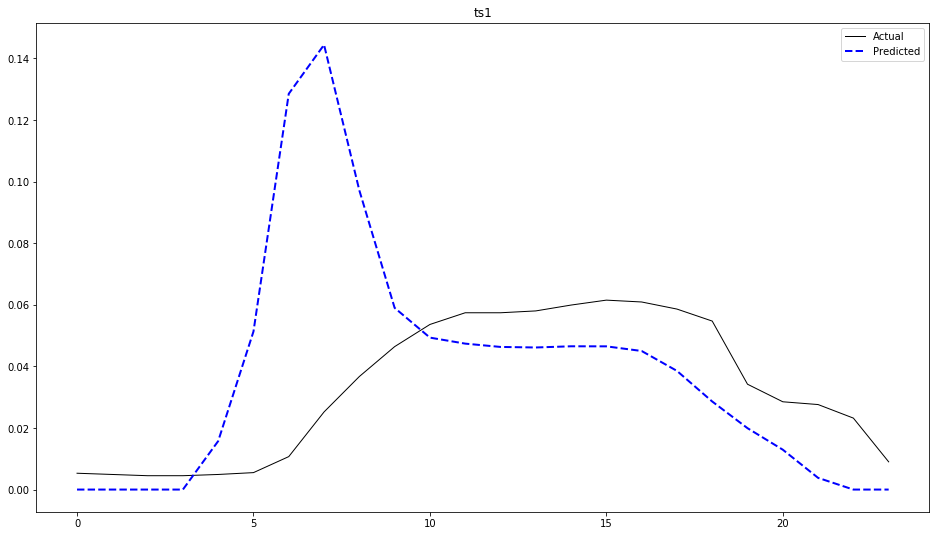

In [11]:
plt.plot(y_test.values, label='Actual', c='k', linewidth=1)
plt.plot(y_pred, label='Predicted', c='b', linestyle='--', linewidth=2)
plt.legend()
plt.title('ts%s' % ts);

Examine example linear regression model coefficients.

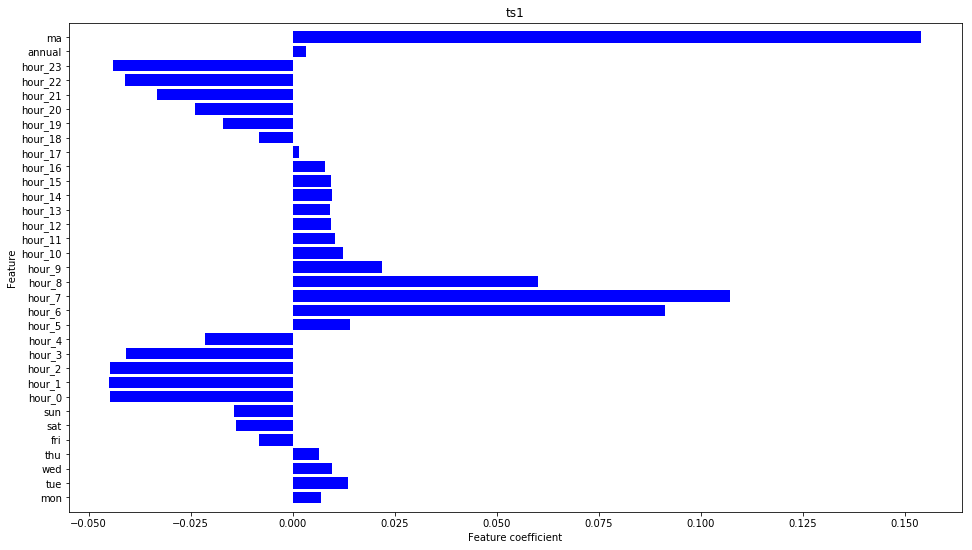

In [12]:
coefs = lr.coef_
cols = df_ex.columns[1:]
params = pd.Series(coefs, index=cols)

fig, ax = plt.subplots()
ax.barh(range(len(params)), params.values, align='center', color='b')
plt.xlabel('Feature coefficient')
plt.yticks(np.arange(len(params)), params.index)
plt.ylabel('Feature')
plt.ylim(-1, len(params))
plt.title('ts%s' % ts);

## Evaluate Linear Regresion

In [13]:
results = df.copy()

for i in range(len(df.columns)):
    ts = i + 1
    dft = select_ts(ts)
    dftf = create_features(dft)
    X_train, X_test, y_train, y_test = split_data(dftf)

    lr = Ridge()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    results['pred%s' % ts] = np.nan
    results['pred%s' % ts].iloc[-prediction_length:] = y_pred

In [14]:
results0 = results.copy()
results0[results0 < 0] = 0

In [15]:
results0.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11,ts12,ts13,ts14,ts15,ts16,ts17,ts18,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28,ts29,ts30,ts31,ts32,ts33,ts34,ts35,ts36,ts37,ts38,ts39,ts40,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50,ts51,ts52,ts53,ts54,ts55,ts56,ts57,ts58,ts59,ts60,ts61,ts62,ts63,ts64,ts65,ts66,ts67,ts68,ts69,ts70,ts71,ts72,ts73,ts74,ts75,ts76,ts77,ts78,ts79,ts80,ts81,ts82,ts83,ts84,ts85,ts86,ts87,ts88,ts89,ts90,ts91,ts92,ts93,ts94,ts95,ts96,ts97,ts98,ts99,ts100,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,pred11,pred12,pred13,pred14,pred15,pred16,pred17,pred18,pred19,pred20,pred21,pred22,pred23,pred24,pred25,pred26,pred27,pred28,pred29,pred30,pred31,pred32,pred33,pred34,pred35,pred36,pred37,pred38,pred39,pred40,pred41,pred42,pred43,pred44,pred45,pred46,pred47,pred48,pred49,pred50,pred51,pred52,pred53,pred54,pred55,pred56,pred57,pred58,pred59,pred60,pred61,pred62,pred63,pred64,pred65,pred66,pred67,pred68,pred69,pred70,pred71,pred72,pred73,pred74,pred75,pred76,pred77,pred78,pred79,pred80,pred81,pred82,pred83,pred84,pred85,pred86,pred87,pred88,pred89,pred90,pred91,pred92,pred93,pred94,pred95,pred96,pred97,pred98,pred99,pred100
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,0.0144,0.0098,0.0157,0.0216,0.0345,0.0545,0.0061,0.0279,0.0200,0.0128,0.0186,0.0097,0.0154,0.0267,0.0441,0.0320,0.0195,0.0169,0.0565,0.0336,0.0200,0.0208,0.0341,0.0457,0.0177,0.0236,0.0082,0.0496,0.0441,0.0097,0.0197,0.0001,0.0321,0.0187,0.0181,0.0370,0.0403,0.0109,0.0281,0.0297,0.0279,0.0127,0.0249,0.0170,0.0308,0.0353,0.0147,0.0219,0.0322,0.0248,0.0275,0.0131,0.0060,0.0097,0.0166,0.0249,0.0340,0.0154,0.0153,0.0333,0.0207,0.0172,0.0156,0.0152,0.0108,0.0104,0.0245,0.0294,0.0193,0.0379,0.0158,0.0166,0.0169,0.0088,0.0226,0.0192,0.0253,0.0519,0.0153,0.0093,0.0330,0.0132,0.0128,0.0776,0.0064,0.0324,0.0099,0.0127,0.0178,0.0132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,0.0162,0.0114,0.0192,0.0239,0.0392,0.0870,0.0095,0.0279,0.0287,0.0134,0.0205,0.0073,0.0150,0.0338,0.0503,0.0424,0.0265,0.0183,0.0531,0.0397,0.0275,0.0265,0.0491,0.0502,0.0162,0.0258,0.0090,0.0573,0.0472,0.0073,0.0214,0.0000,0.0351,0.0211,0.0181,0.0354,0.0443,0.0118,0.0383,0.0341,0.0563,0.0160,0.0245,0.0302,0.0358,0.0478,0.0139,0.0208,0.0312,0.0292,0.0322,0.0164,0.0043,0.0073,0.0177,0.0290,0.0378,0.0191,0.0114,0.0319,0.0270,0.0230,0.0175,0.0158,0.0104,0.0148,0.0381,0.0361,0.0198,0.0510,0.0167,0.0217,0.0183,0.0111,0.0212,0.0275,0.0311,0.0651,0.0114,0.0097,0.0343,0.0173,0.0170,0.1000,0.0083,0.0365,0.0113,0.0142,0.0206,0.0175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,0.0122,0.0074,0.0137,0.0153,0.0233,0.0735,0.0068,0.0163,0.0225,0.0069,0.0142,0.0068,0.0102,0.0237,0.0374,0.0359,0.0180,0.0103,0.0402,0.0385,0.0188,0.0193,0.0348,0.0405,0.0132,0.0171,0.0055,0.0543,0.0413,0.0068,0.0164,0.0000,0.0279,0.0171,0.0136,0.0310,0.0416,0.0077,0.0284,0.0

In [16]:
sMASEs = []
for i, col in enumerate(df.columns):
    sMASEs.append(calc_sMASE(results[col].iloc[-(context_length + prediction_length):-prediction_length],
                             results[col].iloc[-prediction_length:],
                             results['pred%s' % str(i+1)].iloc[-prediction_length:]))

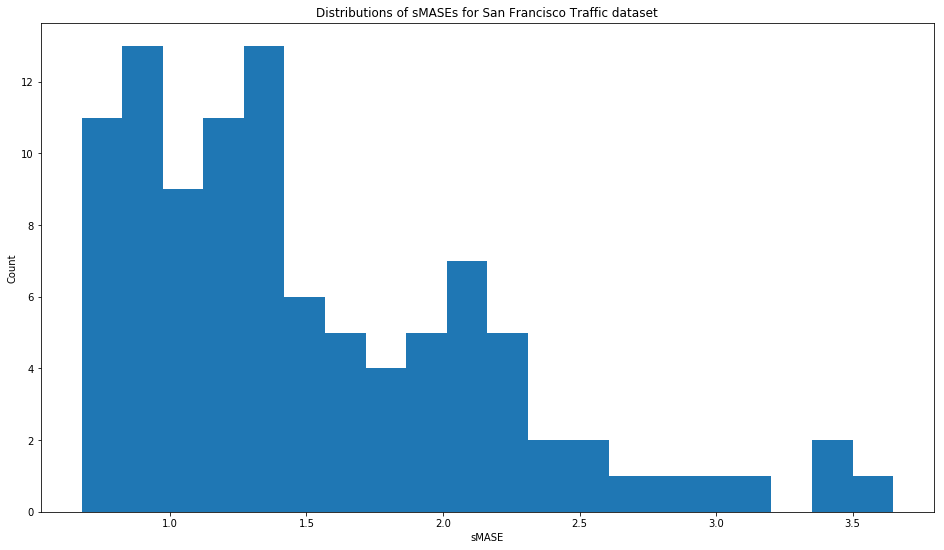

In [17]:
fig, ax = plt.subplots()
ax.hist(sMASEs, bins=20)
ax.set_title('Distributions of sMASEs for {} dataset'.format(dataset_name))
ax.set_xlabel('sMASE')
ax.set_ylabel('Count');

In [18]:
sMASE = np.mean(sMASEs)
print("Overall sMASE: {:.4f}".format(sMASE))

Overall sMASE: 1.5144


Show some example forecasts.

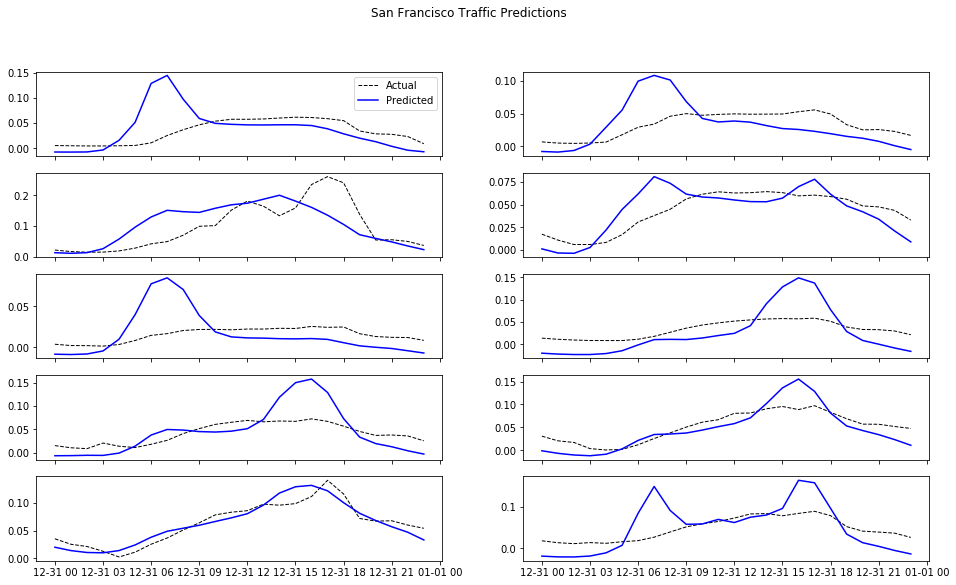

In [19]:
fig, ax = plt.subplots(5, 2, sharex=True)
ax = ax.ravel()

for col in range(1, 11):
    ax[col-1].plot(results.index[-prediction_length:], results['ts%s' % col].iloc[-prediction_length:],
                   label='Actual', c='k', linestyle='--', linewidth=1)
    ax[col-1].plot(results.index[-prediction_length:], results['pred%s' % col].iloc[-prediction_length:],
                   label='Predicted', c='b')
fig.suptitle('{} Predictions'.format(dataset_name))
ax[0].legend();

Store the predictions and accuracy score for the Linear Regression models.

In [20]:
import pickle
    
with open('{}-sMASE.pkl'.format(dataset_abbr), 'wb') as f:
    pickle.dump(sMASE, f)
    
with open('../_results/{}/{}-results.pkl'.format(model_name, dataset_abbr), 'wb') as f:
    pickle.dump(results.iloc[-prediction_length:], f)